# Jakarta, Indonesia COVID Analysis

## Step 1: Import and Clean Data

In [669]:
# Download data and save as csv
# https://docs.google.com/spreadsheets/d/1IY-dOW4o3u7-hbjqKl6hesfmAda0g0J3O6JTo8fvmZ0/edit?usp=sharing

# NOTE: Make sure data is up to date

import pandas

df = pandas.read_csv('SEIR_Indonesia_Data - jakarta.csv') # read in data
print(df.columns) # show column names

Index(['Date', 'New_Case', 'Recovery', 'Death', 'Active_Case', 'Vac_1st_dose',
       'Total_daily_test', 'Daily_Positivity_Rate', 'Death rate', 'CFR',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')


#### Convert data type to data and numeric, replace NaN with 0

In [670]:
column_name = 'Date'
df[column_name] = pandas.to_datetime(df[column_name].str.replace(',',''), errors='coerce')
df[column_name] = df[column_name].fillna(0)
print(df[column_name])


for column_name in ['New_Case', 'Recovery', 'Death', 'Active_Case', 'Vac_1st_dose', 'Total_daily_test']:
    df[column_name] = pandas.to_numeric(df[column_name].str.replace(',',''), errors='coerce')
    df[column_name] = df[column_name].fillna(0)
    print(df[column_name])

for column_name in ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']:
    df[column_name] = df[column_name].fillna(0)
    print(df[column_name])

0     2020-02-15
1     2020-02-16
2     2020-02-17
3     2020-02-18
4     2020-02-19
         ...    
520   2021-07-19
521   2021-07-20
522   2021-07-21
523   2021-07-22
524   2021-07-23
Name: Date, Length: 525, dtype: datetime64[ns]
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
520    5000.0
521    6213.0
522    5904.0
523    7058.0
524    8033.0
Name: New_Case, Length: 525, dtype: float64
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
        ...   
520    12960.0
521    12071.0
522    10558.0
523    10624.0
524    14440.0
Name: Recovery, Length: 525, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
520    242.0
521    265.0
522    265.0
523    173.0
524    156.0
Name: Death, Length: 525, dtype: float64
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
         ...   
520    101395.0
521     95272.0
522     90353.0
523     86614.0
524     80051.0

#### Check to see if moving average can smooth out mobility trend

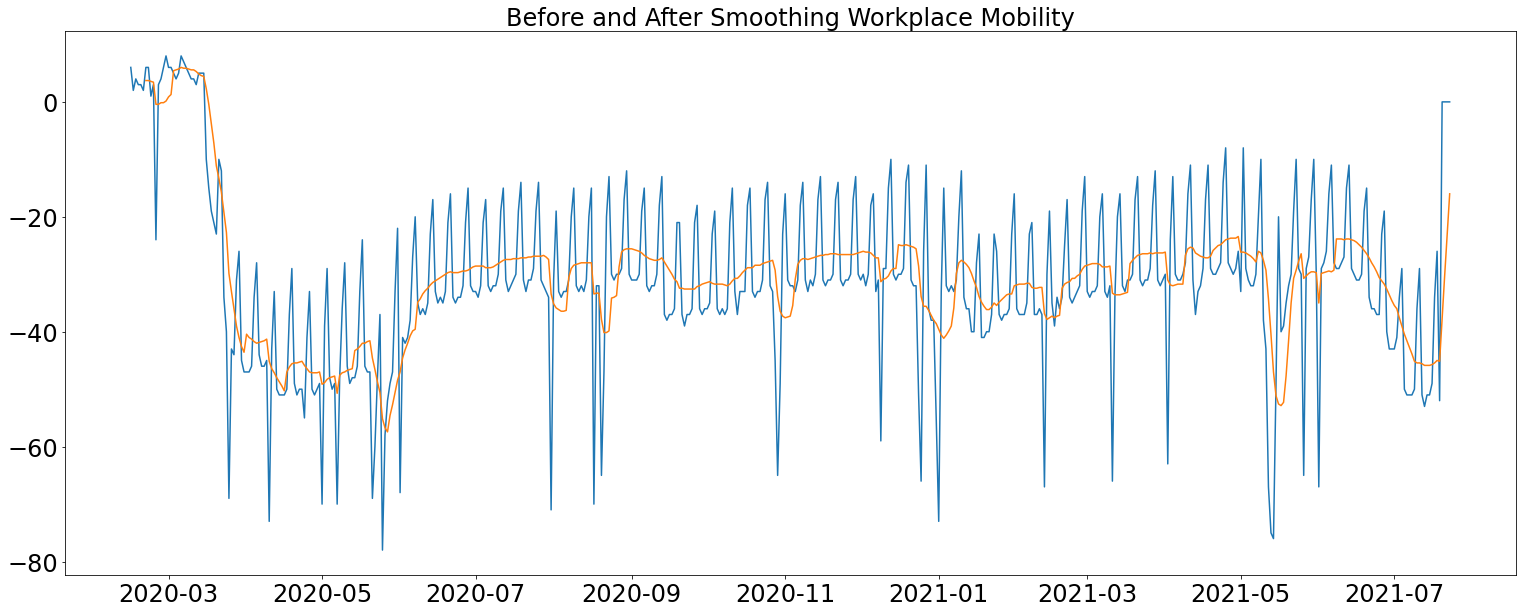

In [671]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.color_palette()


# Using convolution to create running average
plt.plot(df['Date'], df['workplaces_percent_change_from_baseline'])
smoothing_length = 7 # use at least 7 days to cover at least one weekend
plt.plot(df['Date'][smoothing_length-1:], np.convolve(df['workplaces_percent_change_from_baseline'], np.ones(smoothing_length)/smoothing_length, mode='valid'))
plt.title('Before and After Smoothing Workplace Mobility', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
fig = plt.gcf()
fig.set_size_inches(26, 10)

#### Plot mobility and infection trends

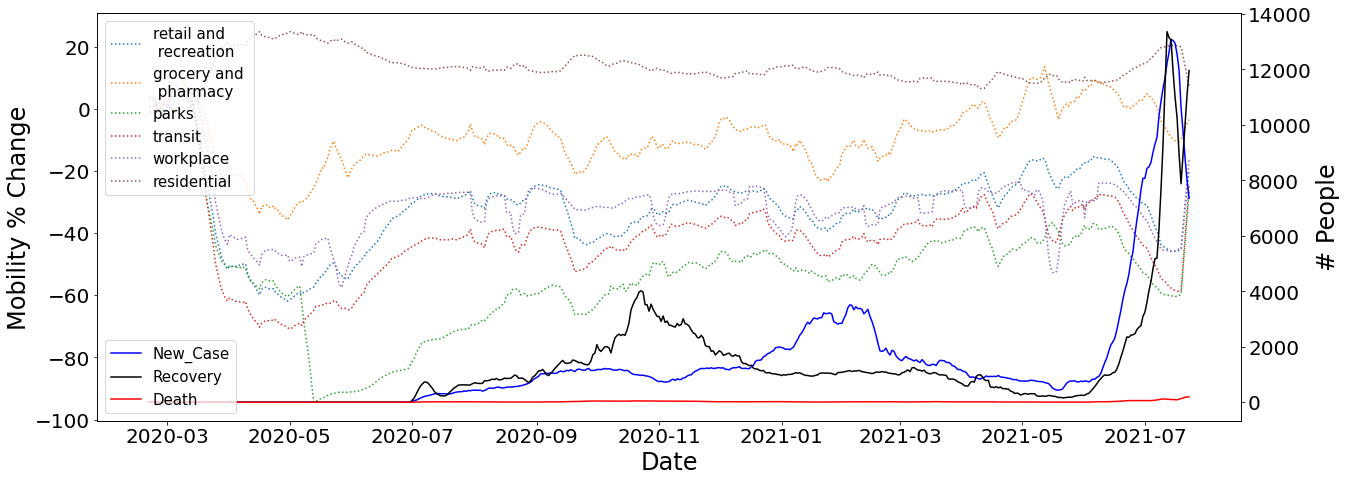

In [672]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
fig.set_size_inches(20.5, 7.5)
# make a plot
ax.plot(df['Date'][smoothing_length-1:], 
        np.convolve(df['retail_and_recreation_percent_change_from_baseline'], np.ones(smoothing_length)/smoothing_length, mode='valid'), 
        color=sns.color_palette()[0], label = 'retail and \n recreation', linestyle='dotted')
ax.plot(df['Date'][smoothing_length-1:], 
        np.convolve(df['grocery_and_pharmacy_percent_change_from_baseline'], np.ones(smoothing_length)/smoothing_length, mode='valid'), 
        color=sns.color_palette()[1], label = 'grocery and \n pharmacy', linestyle='dotted')
ax.plot(df['Date'][smoothing_length-1:], np.convolve(df['parks_percent_change_from_baseline'], np.ones(smoothing_length)/smoothing_length, mode='valid'), 
        color=sns.color_palette()[2], label='parks', linestyle='dotted')
ax.plot(df['Date'][smoothing_length-1:], 
        np.convolve(df['transit_stations_percent_change_from_baseline'], np.ones(smoothing_length)/smoothing_length, mode='valid'), 
        color=sns.color_palette()[3], label='transit', linestyle='dotted')
ax.plot(df['Date'][smoothing_length-1:], 
        np.convolve(df['workplaces_percent_change_from_baseline'], np.ones(smoothing_length)/smoothing_length, mode='valid'), 
        color=sns.color_palette()[4], label='workplace', linestyle='dotted')
ax.plot(df['Date'][smoothing_length-1:], 
        np.convolve(df['residential_percent_change_from_baseline'], np.ones(smoothing_length)/smoothing_length, mode='valid'), 
        color=sns.color_palette()[5], label='residential', linestyle='dotted')
ax.legend(fontsize=15, loc="upper left")
# set x-axis label
ax.set_xlabel("Date",fontsize=24)
# set y-axis label
ax.set_ylabel("Mobility % Change", fontsize=24)
ax.tick_params(axis='both', labelsize=20)


ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df['Date'][smoothing_length-1:], np.convolve(df['New_Case'], np.ones(smoothing_length)/smoothing_length, mode='valid'),color="b", label="New_Case")
ax2.plot(df['Date'][smoothing_length-1:], np.convolve(df['Recovery'], np.ones(smoothing_length)/smoothing_length, mode='valid'),color="k", label="Recovery")
ax2.plot(df['Date'][smoothing_length-1:], np.convolve(df['Death'], np.ones(smoothing_length)/smoothing_length, mode='valid'),color="r", label="Death")

ax2.set_ylabel("# People", fontsize=24)
ax2.tick_params(labelsize=20)
ax2.legend(fontsize=15,loc="lower left")
plt.show()


# save the plot as a file
#fig.savefig('name.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

## Step 2: Prepare Input Data for Simulation 

In [801]:
# Initialize the parameters that are going to be constant throughout the simulation horizon

N_total = 10562088 # Jakarta population size
#d = 1/3 # estimated ratio: identified infections / actual infections
#v = vaccination rate (percent of population vaccinated) ~0.3 (0.2 for Pittsburgh)
# ve = vaccine effectiveness
v, ve = 0.03, 0.653
vrate = 50000/10000000.0 # number of vaccines per day in Indonesia divded by Indonesia population
vrate_new = 150000/10000000.0

# Some vaccinated people are immune
N = N_total

q = 0.3 # mobility reduction before outbreak
qControl = 0.5 # mobility reduction during lock down
qRelax = 0.45 # mobility reduction during relaxed lock down

# Choose day 0, get initial (S,I,R) for Jakarta
I0 = 10
R0 = 0 # N_total * (v * ve)
S0 = N_total - I0 - R0

# lambda: number of people I interact with per time step
# p: probability of getting infected if interact with an infectious person
# gamma: recovery rate (recovery probability within one time step)
lam, p, gamma = 8, 0.06, 1./14 # set lam = 2 vs 20, p = 0.3, gamma = 1/14
# probability of getting infected every time step
#beta = 1 - pow(1-p,lam)
beta = min(1, lam * (1 - q) * p)

# number of days it takes to implement social distancing and quarantine policies
timeToReact = 70 # 5, 15, 25
# number of days to reinforce the policies
SDDuration = 100 # 52 # 14, 56

# simulation time horinzon
totalT = 365

t = np.linspace(0, timeToReact, timeToReact+1)


## Step 3: Run Simulation

#### Integration

In [802]:
from scipy.integrate import odeint

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma, q):
    S, I, R = y
    dSdt = -beta * S * I * (1 - q) / N - vrate * ve * S
    dIdt = beta * S * I * (1 - q) / N - gamma * I
    dRdt = gamma * I + vrate * ve * S
    return dSdt, dIdt, dRdt

def derivVac(y, t, N, beta, gamma, q):
    S, I, R = y
    dSdt = -beta * S * I * (1 - q) / N - vrate_new * ve * S
    dIdt = beta * S * I * (1 - q) / N - gamma * I
    dRdt = gamma * I + vrate_new * ve * S
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, q))
S, I, R = ret.T

# Shutdown Phase
yControl = S[-1] - beta * S[-1] * I[-1] * (1 - q) / N - vrate * ve * S[-1], I[-1] + beta * S[-1] * I[-1] * (1 - q) / N - gamma * I[-1], R[-1] + gamma * I[-1] + vrate * ve * S[-1]
tControl = np.linspace(timeToReact, timeToReact + SDDuration, SDDuration+1)
lamControl = lam * (1 - qControl)
betaControl = min(1, lamControl * p)

retControl = odeint(deriv, yControl, tControl - timeToReact, args=(N, betaControl, gamma, qControl))
SControl, IControl, RControl = retControl.T

# Relaxed Phase
lamRelax = lam * (1-qRelax)
betaRelax = min(1, lamRelax * p)
yRelax = SControl[-1] - betaControl * SControl[-1] * IControl[-1] * (1 - qControl) / N - vrate * ve * SControl[-1], IControl[-1] + betaControl * SControl[-1] * IControl[-1] * (1 - qControl) / N - gamma * IControl[-1], RControl[-1] + gamma * IControl[-1] + vrate * ve * SControl[-1]
tRelax = np.linspace(timeToReact + SDDuration, totalT, totalT - timeToReact - SDDuration + 1)


retRelax = odeint(derivVac, yRelax, tRelax - timeToReact - SDDuration, args=(N, betaRelax, gamma, qRelax))
SRelax, IRelax, RRelax = retRelax.T

In [803]:
# Calculate daily new cases

activeS = np.concatenate([S, SControl, SRelax])


activeI = np.concatenate([I, IControl, IRelax])
newI = np.copy(activeI)
newI[0] = 0
for i in range(len(newI)-1):
    newI[i+1] = activeI[i+1] - activeI[i]
    

activeR = np.concatenate([R, RControl, RRelax])
newR = np.copy(activeR)
newR[0] = 0
for i in range(len(newR)-1):
    if i < timeToReact + SDDuration + 2:
        newR[i+1] = activeR[i+1] - activeR[i] - vrate * ve * activeS[i]
    else:
        newR[i+1] = activeR[i+1] - activeR[i] - vrate_new * ve * activeS[i]


#### Plot SIR Trajectories

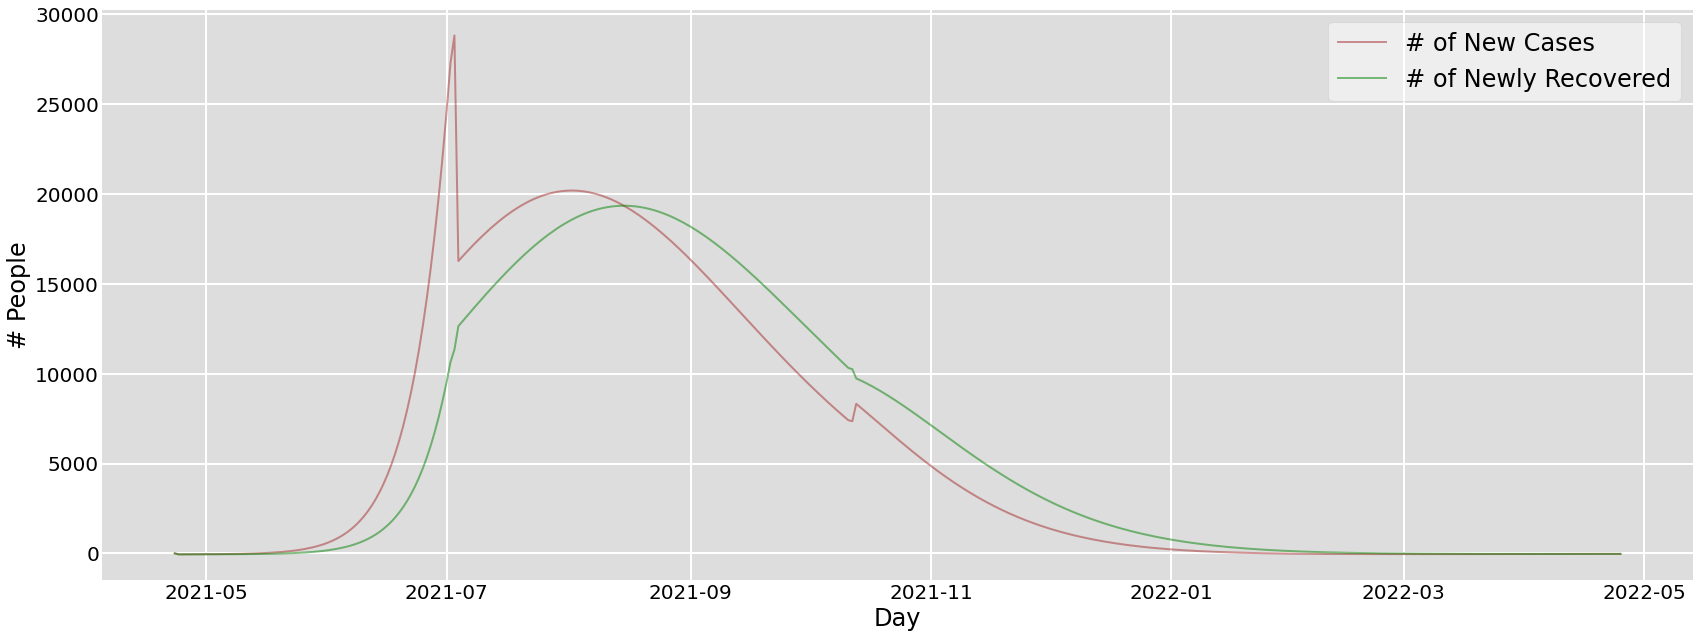

In [804]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
fig.set_size_inches(28.5, 10.5)
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

dateAxis = np.arange(np.datetime64('2021-04-23'), np.datetime64('2022-04-26'))

#ax2 = ax.twinx()
#ax.plot(np.concatenate([t, tControl, tRelax]), np.concatenate([S, SControl, SRelax]), 'b', alpha=0.5, lw=2, label='Susceptible')
#ax.plot(np.concatenate([t, tControl, tRelax]), activeI, 'r', alpha=0.5, lw=2, label='Active Number of Infected')
ax.plot(dateAxis, newI + newR, 'brown', alpha=0.5, lw=2, label='# of New Cases')
ax.plot(dateAxis, newR, 'g', alpha=0.5, lw=2, label='# of Newly Recovered')


ax.set_xlabel('Day', fontsize=24)
ax.set_ylabel('# People', fontsize=24)
ax.tick_params(axis='both', labelsize=20)
#ax2.set_ylabel("Cumulative Death ('000)", color='brown')
#ax.set_ylim(0,1.1)
#ax2.set_ylim(0,1500000/1000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax2.yaxis.set_tick_params(colors='brown')

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize=24)
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# TODO need death rate. e.g., total death / total infection
# TODO three curves: daily new cases, daily recovered/died
# TODO change x axis to reflect actual dates; tick mark per month or week
# TODO Policy based on three parameters? shutdown duration, travel restriction level, and vaccine rate

In [800]:
np.max(newI + newR)

28820.350785654824

#### Some Potential Insights

* The daily vaccination number should be at least on par with the daily new case rate, in order for vaccination to make a difference. Otherwise we are just letting the disease run its course.
    * For example, if the daily new case count is 40,000 in Jakarta, and Jakarta's population is ~10,000,000, then we should vaccinate about 40,000 people per day in Jakarta, or roughly 1,000,000 people per day for Indonesia.

* Sudden re-opening creates problem because a surge can lead to many cases infecting population together. Slow opening can let one batch of cases wear off before another batch happen.

Under the assumption that case discovery is about 30%:

vrate_new = 0.3e6, mobility = 0.47 -> max new count 40642 at day 130 

vrate_new = 1.0e6, mobility = 0.44 -> max new count 41716 at day 125

vrate_new = 2.0e6, mobility = 0.43 -> max new count 40642 at day 120